# 1. Tome de la web una imagen en cualquier formato y guarde el archivo correspondiente en la carpeta descargas.
# Ahora, haga lo siguiente <u>con el archivo</u>:

#### a Móntelo en colab
#### b Copie el nombre completo en el portapapeles
#### c Escriba el código dado a continuación para obtener el tensor correspondiente y su dimensión:

 import cv2, numpy as np, matplotlib.pyplot as plt
 
 Tensor=cv2.imread("/content/Foto_Profesor_Mancilla.jpg")

 Tensor=Tensor[:,:,::-1]

 fig,ax=plt.subplots(2,2);fig.set_size_inches(8,8);

 filas,columnas,capas = Tensor.shape;print(Tensor.shape)

 ax[0,0].imshow(Tensor)
#### c Imprima en los tres lienzos en blanco lo siguiente
#1. El logo de la cruz roja

#2. Una X verde

#3. Marco azul

#Ayuda: RGB. El tensor siempre tiene tres capas.
* La primera corresponde a la tonalidad roja. Esto es, 255 corresponde a (Red).
* Idem para la segunda capa (Green) y la tercera(Blue)

In [1]:
import cv2, numpy as np, matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(450, 450, 3)


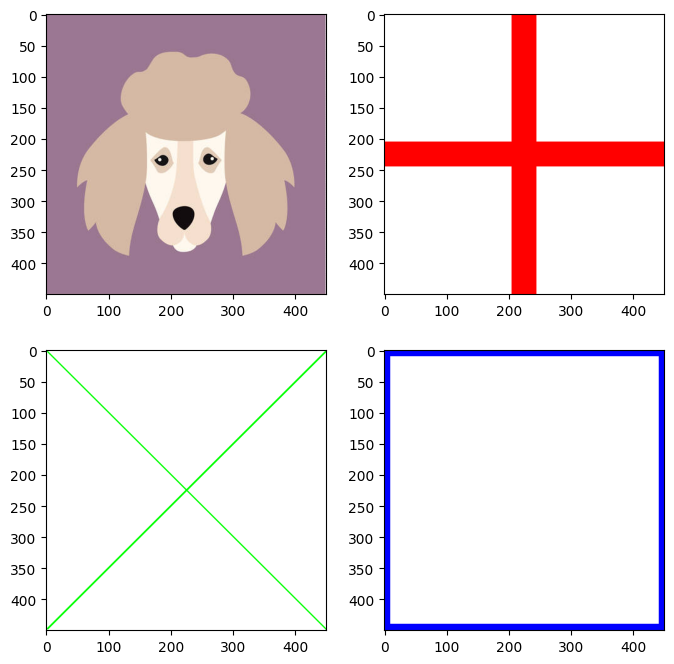

In [2]:
# Foto sacado de: https://www.google.com/search?sca_esv=564504230&rlz=1C1GCEU_esCO1066CO1066&sxsrf=AB5stBhu8Olj6ck0WXryouUh9xvmYvSlVw:1694473746511&q=perro+jpg+cuadrado&tbm=isch&source=lnms&sa=X&ved=2ahUKEwjTsPfN1qOBAxUUkWoFHZTCAI8Q0pQJegQIDBAB&biw=1600&bih=783&dpr=1#imgrc=EjJVEQ251dmeQM
Tensor=cv2.imread("perro.jpg")


Tensor=Tensor[:,:,::-1]
fig,ax=plt.subplots(2,2)
fig.set_size_inches(8,8)

filas,columnas,capas = Tensor.shape
print(Tensor.shape)
ax[0,0].imshow(Tensor)

# Crear lienzos blancos
lienzo1 = np.ones((filas,columnas,capas))*255
lienzo2 = np.ones((filas,columnas,capas))*255
lienzo3 = np.ones((filas,columnas,capas))*255

# Definir los colores
rojo = [255, 0, 0]
verde = [0, 255, 0]
azul = [0, 0, 255]

# Dibujo de la cruz roja
ancho_cruz = 20
lienzo1[filas//2 - ancho_cruz: filas//2 + ancho_cruz,:,:] = rojo
lienzo1[:, columnas//2 - ancho_cruz: columnas//2 + ancho_cruz, :] = rojo

# Dibujo de la X verde
ancho_x = 2
for f in range(filas):
  lienzo2[f-1,np.abs(filas - f-1): np.abs(filas - f-1)+2*ancho_x,:] = verde
  lienzo2[f-1:f-1+ancho_x,f-1:f-1+ancho_x,:] = verde

# Dibujo del marco azul
ancho_marco = 10
lienzo3[:, :ancho_marco, :] = azul
lienzo3[:, -ancho_marco:, :] = azul
lienzo3[:ancho_marco, :, :] = azul
lienzo3[-ancho_marco:, :, :] = azul

# Muestra los lienzos en el plot
ax[0,1].imshow(lienzo1)
ax[1,0].imshow(lienzo2)
ax[1,1].imshow(lienzo3)

plt.show()

#2.) Simulación del lanzamiento de dos dados. (craps).
# Primer Lanzamiento:
*   Ganas automáticamente si sacas 7 u 11. 🙂
*   Pierdes si obtienes 2, 3 o 12. A esto se le conoce como “Craps”. 😠

# Dos o más Lanzamientos:
En caso de sacar 4, 5, 6, 8, 9 o 10, continúas lanzando repetidamente los dos dados hasta que:

* Se repita el resultado del primer lanzamiento, en cuyo caso ganas. 🙂
* Obtienes un 7 antes de que se repita el resultado de tu primer lanzamiento, así pierdes. 😠

Escriba una función craps() que simule un juego y regrese:
* Ganó o perdió
* Suma del último lanzamiento
* Número de lanzamientos en el juego.
* Llamado a craps: sw, end, nl = craps()

Ejemplos: Si la lista de los lanzamientos es:
* [5, 9, 2, 12, 4, 3, 2, 11, 8, 9, 3, 4, 10, 7] craps regresa [False, 7, 14]
* [3] craps regresa [False, 3, 1]
* [4, 2, 3, 11, 10, 12, 5, 5, 4] craps regresa [True, 4, 9]
* [11]  craps regresa [True, 11, 1]
* [8, 3, 4, 11, 6, 7] craps regresa [False, 7, 6]

## Grafique ganados y perdidos por cada resultado posible. Esto es, [2,3,4,...,11,12]

### Funcion de craps

In [3]:
def craps(throws):
  score = throws[0]
  if score in (7,11):
    return [True, score, 1]
  elif score in (2,3,12):
    return [False,score,1]

  for i, score in enumerate(throws[1:], start=2):
    if score == 7:
      return [False,score,i]
    elif score == throws[0]:
      return [True,score,i]

  return [None,score,len(throws)]

### Prueba del ejemplo, para confirmar los resultados

In [4]:
throws = [
    [6,9,2,12,4,3,2,11,8,9,3,4,10,7],
    [3],
    [4,2,3,11,10,12,5,5,4],
    [8,3,4,11,6,7],
]

for throw in throws:
  print(craps(throw))

[False, 7, 14]
[False, 3, 1]
[True, 4, 9]
[False, 7, 6]


### Grafica de ganados y perdidos por cada resultado posible

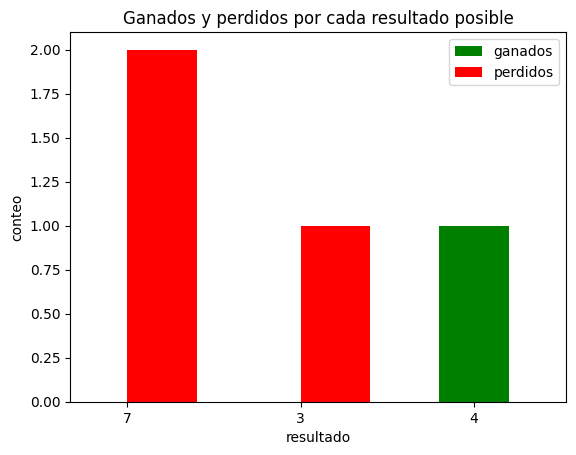

In [5]:
results = {}

for throw in throws:
  result = craps(throw)
  outcome, score, _ = result
  if outcome is not None:
    results[score] = results.get(score, {"win":0, "loss":0})
    results[score]["win" if outcome else "loss"] +=1

scores = list(results.keys())
wins = [results[score]["win"] for score in scores]
losses = [results[score]["loss"] for score in scores]
x = range(len(scores))

plt.bar(x, wins, width = 0.4, label = "ganados", color = "g", align = "center")
plt.bar(x, losses, width = 0.4, label = "perdidos", color = "r", align = "edge")

plt.xlabel("resultado")
plt.ylabel("conteo")
plt.title("Ganados y perdidos por cada resultado posible")
plt.xticks(x, scores)
plt.legend()

plt.show()